In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('data/ab_data.csv') as f:
    df = pd.read_csv(f)

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [6]:
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [7]:
df.converted.unique()

array([0, 1], dtype=int64)

In [8]:
df[['group', 'landing_page', 'converted']].nunique()

group           2
landing_page    2
converted       2
dtype: int64

In [9]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [10]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [11]:
df.shape

(294478, 5)

In [12]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

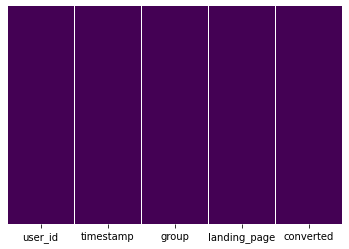

In [13]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = False, cmap = 'viridis')

In [14]:
len(df[df.duplicated()])

0

In [15]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [16]:
df.timestamp = pd.to_datetime(df.timestamp)

In [17]:
print('The A/B testing was conducted for:', len(df.timestamp.dt.floor('d').value_counts()), 'days')

The A/B testing was conducted for: 23 days


In [18]:
print('The website was visited', df.shape[0], 'times')

The website was visited 294478 times


##### Proportion of converted users

In [19]:
df.converted.sum() / df.shape[0]

0.11965919355605512

In [20]:
print('Round up the converted users to', np.round(df.converted.sum() / df.shape[0] * 100), '%')

Round up the converted users to 12.0 %


##### Control group conversion rate

In [21]:
rate = df[df.group == 'control']
np.round(rate.converted.sum() / rate.shape[0], 2)

0.12

##### Treatment group conversion rate

In [22]:
convert = df[df.group == 'treatment']
np.round(convert.converted.sum() / convert.shape[0], 2)

0.12

##### Probability that an individual came across the new page

In [23]:
(df.landing_page == 'new_page').sum() / df.shape[0]

0.5

##### Probability that an individual came across the old page

In [24]:
(df.landing_page == 'old_page').sum() / df.shape[0]

0.5

There seem to be no sufficient evidence to suggest that the new treatment page can lead to more conversion rate, since the conversion rate for both the old and the new page appears to be 0.12 with the probability of 0.5 of visiting each of the page.

In [25]:
df.user_id.nunique()

290584

In [26]:
df.user_id.shape

(294478,)

In [27]:
df[df.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
192,656468,2017-01-18 07:13:29.805052,treatment,new_page,1
226,773693,2017-01-23 18:05:45.167335,control,old_page,1
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
246,704650,2017-01-04 19:10:52.655062,treatment,new_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


In [28]:
df[((df.group == 'treatment') & (df.landing_page != 'new_page')) | ((df.group != 'treatment') & (df.landing_page == 'new_page'))]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
...,...,...,...,...,...
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [29]:
df[((df.group == 'treatment') & (df.landing_page != 'new_page')) | ((df.group != 'treatment') & (df.landing_page == 'new_page'))].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

Now, for the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page. So we drop all the rows that don't meet the specifications. I assign the result to a new dataframe variable.

##### Checking for mismatch of the treatment group not aligning with the new page as well as the control group not aligning with old page. 

In [30]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

##### Make use of exclusive OR (XOR) to find disalignment between page and corresponding group

In [31]:
df2 = df.drop(df[((df['group'] == 'treatment') ^ (df['landing_page'] == 'new_page'))].index, axis=0)

##### Double Check all of the correct rows were removed - this should return 0

In [32]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

# **A/B test experimentation**

**Objective:** Finding if there is a significance difference between the conversion rates for the old page and new page.

## Step 1: **Statement of the Hypothesis**

**Null Hypothesis:** There is no difference in the conversion rate between the old page and the new page.

**Alternative Hypothesis:** There is difference in the conversion rate between the old page and the new page.

𝐻𝑜 :   old_page  =  new_page

𝐻1 :   old_page  ≠   new_page

**old_page:** conversion rate for the old page.

**new_page:** conversion rate for the new page.

## Step 2: **Significant levels (alpha)**

alpha = 𝛼

𝛼 = 5% = 5/100 = 0.05

Confidence level = 95%

Power of the test = 80%

In [33]:
import statsmodels.stats.api as sm
from scipy.stats import norm
from math import ceil

##### Calculating the effect size based on our target rate
With 12% of the old page revenue as the baseline

**Old page** = 12%

**Target** = 14%

**Old page - Target** = 2%

**effect_size** is between 0.12 and 0.14

In [34]:
effect_size = sm.proportion_effectsize(0.12, 0.14)

In [35]:
effect_size

-0.05951079608252374

##### Calculating the sample size for each group

In [36]:
sample_size = sm.NormalIndPower().solve_power(
effect_size,
power = 0.8,
alpha = 0.05)

sample_size = ceil(sample_size)

In [37]:
sample_size

4433

The sample size of users for both the control and the treatment group.

Control = **4433**

Treatment = **4433**

Set conversion rates and sample size for both groups

In [38]:
Old_page = df2.converted.mean()
New_page = df2.converted.mean()
Old_page_users = df2[df2.landing_page == 'old_page'].shape[0]
New_page_users = df2[df2.landing_page == 'new_page'].shape[0]
print(f'Old page: {Old_page}\nNew page: {New_page}\nOld page users: {Old_page_users}\nNew page users: {New_page_users}')

Old page: 0.11959667567149027
New page: 0.11959667567149027
Old page users: 145274
New page users: 145311


#### Simulation of the two binomial distributions and the difference in their conversion rates

In [39]:
Old_page_conversion = np.random.binomial(1, p = Old_page, size = Old_page_users)
New_page_conversion = np.random.binomial(1, p = New_page, size = New_page_users)

In [40]:
New_page_conversion.mean()

0.11974317154241593

In [41]:
Old_page_conversion.mean()

0.11807343364951746

In [42]:
Conversion_differences = New_page_conversion.mean() - Old_page_conversion.mean()

In [43]:
Conversion_differences

0.001669737892898468

#### Simulating the difference of the two binomial distributions with sample size of 4433 random users for both old page and new page.

In [44]:
Old_page_conversion = np.random.binomial(New_page_users, New_page, 4433)
New_page_conversion = np.random.binomial(Old_page_users, Old_page, 4433)

In [45]:
page_difference = New_page_conversion / New_page_users - Old_page_conversion / Old_page_users

In [46]:
page_differences = np.array(page_difference)

In [47]:
page_differences

array([ 0.00065094, -0.00133108, -0.00205379, ...,  0.00202764,
        0.00093315, -0.0016479 ])

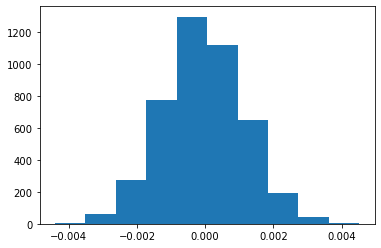

In [48]:
plt.hist(page_differences);

In [49]:
test = [df2[df2.landing_page == 'old_page'].converted.sum(), df2[df2.landing_page == 'new_page'].converted.sum()]
p_val = [df2[df2.landing_page == 'old_page'].shape[0], df2[df2.landing_page == 'new_page'].shape[0]]

## Step 3: **Test statistic**

Using **Z-test** for the experiment

In [50]:
z_test, p_value = sm.proportions_ztest(test, nobs = p_val)
(lower_control, lower_treatment), (upper_control, upper_treatment) = sm.proportion_confint(test, nobs = p_val)

In [51]:
print(f'z_test statistic: {z_test:.2f}')
print(f'p-value: {p_value:.3f}')
print(f'95% Confidence level for control group: [{lower_control:.3f}, {upper_control:.3f}]')
print(f'95% Confidence level for treatment group: [{lower_treatment:.3f}, {upper_treatment:.3f}]')

z_test statistic: 1.31
p-value: 0.190
95% Confidence level for control group: [0.119, 0.122]
95% Confidence level for treatment group: [0.117, 0.120]


## Step 4: **The Decision rule**

Two tail test: 1 - 𝛼

𝛼 = 0.05

so, 1 - 0.05 = 0.95 / 2 = 0.4750

From z-table 0.4750 results to 1.96 which is the critical value or z-tabulated value.

**Critical value** = 1.96

**Decision rule 1:** If the **p-value < 𝛼** then you'll reject the Null hypothesis (𝐻𝑜) and accept the Alternate hypothesis (𝐻1), **but** if the **p-value > 𝛼** then you'll fail to reject the Null hypothesis (𝐻𝑜) and reject the Alternate hypothesis (𝐻1).

**Decision rule 2:** If the **z-test statistic < critical value** then you'll fail to reject the Null hypothesis (𝐻𝑜) and reject the Alternate hypothesis (𝐻1), because the z-test statistic falls within the acceptance region, **but** if the **z-test statistic > critical value** then you'll reject the Null hypothesis (𝐻𝑜) and accept the Alternate hypothesis (𝐻1), because the z-test statistic falls in the rejection region.

#### Calculating the **Critical value** using **norm.ppf()** from scipy.stats

In [52]:
percent_point_function = norm.ppf(1 - 0.05/2)
Critical_value = np.round(percent_point_function, 2)

In [53]:
Critical_value

1.96

## Step 5: **Making a decision**

**Using p-value in making a decision**

p-value = 0.190

alpha = 0.05

In conclusion, the p-value and the alpha show that the **p-value > 𝛼** and with the result, i'll fail to reject the null hypothesis i.e there is no statistical significant difference between the conversion rate of the old page and the new page. Therefore, **there will be no increase or any statistical significant increase in the revenue metric** which is the goal for the test.

**OR**

**Using critical value in making a decision**

Critical value = 1.96

z-test statistic = 1.31

Using the critical value in making a decision, it appears that the z-test statistic falls within the acceptance region because it is less than the critical value. So, from the result i'll fail to reject the null hypothesis but to accept that **there will be no increase or any statistical significant increase in the revenue metric** due to, there will not be any statistical significant change in the conversion rate between the old page and the new page.